<h1>CS4618: Artificial Intelligence I</h1>
<h1>Underfitting and Overfitting Remedies</h1>
<h2>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h2>

<h1>Initialization</h1>
$\newcommand{\Set}[1]{\{#1\}}$ 
$\newcommand{\Tuple}[1]{\langle#1\rangle}$ 
$\newcommand{\v}[1]{\pmb{#1}}$ 
$\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ 
$\newcommand{\rv}[1]{[#1]}$ 
$\DeclareMathOperator{\argmax}{arg\,max}$ 
$\DeclareMathOperator{\argmin}{arg\,min}$ 
$\DeclareMathOperator{\dist}{dist}$
$\DeclareMathOperator{\abs}{abs}$

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import matplotlib.gridspec as gridspec
from ipywidgets import interactive

<h1>Introduction</h1>
<ul>
    <li>You are building a predictor but its performance is not good enough.
        What should you do?
    </li>
    <li>Some of the options include:
        <ul>
            <li>gather more training examples;</li>
            <li>remove noise in the training examples;</li>
            <li>add more features or remove features;</li>
            <li>change model: move to a more complex model or maybe to a less complex model;</li>
            <li>stick with your existing model but add constraints to it to reduce its complexity or
                remove constraints to increase its complexity.
            </li>
        </ul>
    </li>
    <li>Surprisingly, 
        <ul>
            <li>gathering more training examples may not help;</li>
            <li>adding more features may in some cases worsen the performance;</li>
            <li>changing to a more complex model may in some cases worsen the performance</li>
        </ul>
        &hellip;it all depends on what is causing the poor performance (underfitting or overfitting).
    </li>
</ul>

<h1>Underfitting</h1>
<ul>
    <li>If your model underfits:
        <ul>
            <li>gathering more training examples will not help.</li>
        </ul>
    </li>
    <li>Your main options are:
        <ul>
            <li>change model: move to a more complex model;</li>
            <li>collect data for additional features that you hope will be more predictive;</li>
            <li>create new features which you hope will be predictive (see <b>feature engineering</b>
                in the next lecture);</li>
            <li>stick with your existing model but remove constraints (if you can) to increase 
                its complexity.
            </li>
        </ul>
    </li>
    <li>What additional features do you think would be predictive of Cork property prices?</li>
</ul>

<h1>Overfitting</h1>
<ul>
    <li>If your model overfits, your main options are:
        <ul>
            <li>gather more training examples;</li>
            <li>remove noise in the training examples;</li>
            <li>change model: move to a less complex model;</li>
            <li>simplify by reducing the number of features;</li>
            <li>stick with your existing model but
                add constraints (if you can) to reduce its complexity.
            </li>
        </ul>
    </li>
</ul>

<h1>Regularization</h1>
<ul>
    <li>If your model underfits, we saw that one option is:
        <ul>
            <li>stick with your existing model but
                <em>remove</em> constraints (if you can) to increase its complexity.
            </li>
        </ul>
    </li>
    <li>If your model overfits, we saw that one option is:
        <ul>
            <li>stick with your existing model but
                <em>add</em> constraints (if you can) to reduce its complexity.
            </li>
        </ul>
    </li>
    <li>Constraining a model to make it less complex and reduce the risk of overfitting is called
        <b>regularization</b>. Regularization is a general concept but we will explain it in the 
        case of linear regression in the rest of this lecture.
    </li>
</ul>

<h1>Regularization for Linear Regression</h1>
<ul>
    <li>Linear models are among the least complex models.
        <ul>
            <li>Hence, we normally associate them with underfitting.</li>
        </ul>
    </li>
    <li>But, even linear regression might overfit the training data.</li>
    <li>If you are overfitting, you must reduce the degrees of freedom.
        <ul>
            <li>One way is to discard some features.
                <ul>
                    <li>Then you have fewer coefficients ($\v{\beta}$) that you can modify.</li>
                </ul>
            </li>
            <li>Another way is to constrain the range of values that the coefficients can take:
                <ul>
                    <li>E.g. force the learning algorithm to only choose small values (close to zero).</li>
                    <li>Recall that OLS linear regression finds coeffficients $\v{\beta}$ that minimize
                        $$J(\v{X}, \v{y}, h_{\v{\beta}}) = \frac{1}{2m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{i)}) - \v{y}^{(i)})^2$$
                        Regularization imposes a penalty on the size of the coefficients.
                    </li>
                </ul>
                This is how we regularize linear regression.
                <ul>
                    <li>In effect, it <em>penalizes</em> hypotheses that fit the data too well.</li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

<h2>Lasso Regression: Using the $\cal{l}_1$-norm</h2>
<ul>
    <li><b>Lasso Regression</b>:
        <ul>
            <li>'Lasso' stands for 'least absolute shrinkage and selection operator' &mdash; but
                this doesn't matter!
            </li>
            <li>We penalize by the $\cal{l}_1$-norm of $\v{\beta}$, which is simply the sum of their 
                absolute values, i.e. 
                $$\sum_{j=1}^n|\v{\beta}_j|$$
            </li>
            <li>(Minor point: we don't penalize $\v{\beta}_0$, which is why $j$ starts at 1.)</li>
        </ul>
    </li>
    <li>So Lasso Regression finds the $\v{\beta}$ that minimizes
        $$J(\v{X}, \v{y}, h_{\v{\beta}}) = \frac{1}{2m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{i)}) - \v{y}^{(i)})^2
        + \lambda\sum_{j=1}^n|\v{\beta}_j|$$
    </li>
    <li>$\lambda$ is called the 'regularization parameter'.
        <ul>
            <li>It controls how much penalization we want and this determines the balance between the 
                two parts of the modified loss function: fitting the data versus shrinking the parameters.
            </li>
            <li>As $\lambda \rightarrow 0$, Lasso Regression gets closer to being OLS Linear Regression.</li>
            <li>When $\lambda = 0$, Lasso Regression is the same as OLS Linear Regression.</li>
            <li>When $\lambda \rightarrow \infty$, penalties are so great that all the coefficients will tend 
                to zero: the only way to minimize the loss function will be to make the coefficients
                as small as possible. It's likely that in this case we will underfit the data.
            </li>
        </ul>
        So, for regularization to work well, we must choose the value of $\lambda$ carefully.
        <ul>
            <li>So what kind of thing is $\lambda$?</li>
        </ul>
    </li>
    <li>An important observation about Lasso Regression:
        <ul>
            <li>As $\lambda$ grows, some of the $\v{\beta}_j$ will be driven to zero.</li>
            <li>This means that the model that it learns treats some features as irrelevant.</li>
            <li>Hence, it performs some <b>feature selection</b> too.</li>
            <li>Compare this with Ridge Regression below.</li>
        </ul>
    </li>
</ul>

<h3>Implementing Lasso Regression</h3>
<ul>
    <li>
        There is no equivalent to the Normal Equation.
    </li>
    <li>
        Even Gradient Descent has a problem:
        <ul>
            <li>The Lasso loss function is not differentiable at $\v{\beta}_i = 0$.</li>
            <li>scikit-learn uses an approach called 'coordinate descent' (details unimportant).
                <ul>
                    <li>There is a special class, <code>Lasso</code>.
                    </li>
                    <li>Or you can use <code>SGDRegressor</code> with <code>penalty="l1"</code>.</li>
                </ul>
                They both refer to $\lambda$ as <code>alpha</code>!
            </li>
            <li>Scaling is usually advised.</li>
        </ul>
    </li>
</ul>

<h2>Ridge Regression: Using the $\cal{l}_2$-norm</h2>
<ul>
    <li><b>Ridge Regression</b>:
        <ul>
            <li>We penalize by the $\cal{l}_2$-norm, which is simply the sum of the squares of the
                coefficients, i.e. 
                $$\sum_{j=1}^n\v{\beta}_j^2$$ 
                (Strictly speaking, the $\cal{l}_2$-norm is the square root of the sum of squares.) 
            </li>
        </ul>
    </li>
    <li>So Ridge Regression finds the $\v{\beta}$ that minimizes
        $$J(\v{X}, \v{y}, h_{\v{\beta}}) = \frac{1}{2m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{i)}) - \v{y}^{(i)})^2
        + \lambda\sum_{j=1}^n\v{\beta}_j^2$$
    </li>
    <li>Both Lasso and Ridge Regression shrink the values of the coefficients.
        <ul>
            <li>But, as we mentioned, Lasso Regression may additionally result in coefficients being set to zero.
            </li>
            <li>This does not happen with Ridge Regression.</li>
            <li>Optionally, consult section 3.4.3 of <i>The Elements of Statistical Learning</i> 
                by Hastie, Friedman &amp; Tibshirani (available online) for an explanation.
            </li>
            <li>One observation from the book is that, roughly speaking, Lasso Regression shrinks the
                coefficients by approximately the same <em>constant amount</em> (unless they are so small 
                that they get shrunk to zero), whereas, again roughly speaking, Ridge Regression shrinks the
                coefficients by approximately the same <em>proportion</em>.
            </li>
        </ul>
    </li>
</ul>

<h3>Implementing Ridge Regression</h3>
<ul>
    <li>There is an equivalent to the Normal Equation (solved, e.g., by Cholesky decomposition).
        <ul>
            <li>Take the gradient, set it equal to zero, and solve for $\v{\beta}$ (details unimportant):
                $$\v{\beta} = (\v{X}^T\v{X} + \lambda\v{I})^{-1}\v{X}^T\v{y}$$
            </li>
            <li>In the above, $\v{I}$ is the $(n+1)$ identity matrix, i.e. all zeros except for the main 
                diagonal which 
                is all ones. (In fact, for consistency with what we were doing above, where we chose not to penalize
                $\v{\beta}_0$, you want a zero in the top left, so this is not really the identity matrix.)
            </li>
            <li>Also, you don't need to implement this with the pseudo-inverse. It's possible to prove that,
                provided $\lambda > 0$, then $\v{X}^TX + \lambda\v{I}$ will be invertible.
            </li>
        </ul>
    </li>
    <li>Alternatively, use Gradient Descent:
        <ul>
            <li>The update rule for $\v{\beta}_j$ for all $j$ except $j = 0$ becomes:
                $$\v{\beta}_j \gets \v{\beta}_j - 
                    \alpha(\frac{1}{m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)}) \times \v{x}_j^{(i)} +
                    \frac{\lambda}{m}\v{\beta}_j)$$
            </li>
            <li>We can re-arrange this to:
                $$\v{\beta}_j \gets \v{\beta}_j(1 - \alpha\frac{\lambda}{m}) - 
                    \alpha\frac{1}{m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)}) \times \v{x}_j^{(i)}$$
                which helps to show why this shrinks $\v{\beta}_j$
            </li>
            <li>In scikit-learn, there is a special class, <code>Ridge</code> 
                <ul>
                    <li>You can set its <code>solver</code> parameter to choose different methods, or leave it as
                        default <code>auto</code>.
                    </li>
                </ul>
            </li>
            <li>Or you can use <code>SGDRegressor</code> with <code>penalty="l2"</code>.
            </li>
        </ul>
    </li>
    <li>Scaling is usually advised</li>
</ul>

<h1>Illustrating the Effects of Lasso and Ridge Regression</h1>
<ul>
    <li>We'll generate a random, non-linear dataset.</li>
    <li>Then we'll fit an unregularized linear model and two regularized models (Lasso and Ridge).</li>
</ul>

In [21]:
def make_dataset(m, func, error):
    X = np.random.random(m)
    y = func(X, error)
    return X.reshape(m, 1), y

def f(x, error = 1.0):
    y = 10 - 1 / (x + 0.1)
    if error > 0:
        y = np.random.normal(y, error)
    return y

In [22]:
X, y = make_dataset(50, f, 1.0)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = np.random)

In [24]:
# We don't need to scale here because there is only one feature

ols = LinearRegression()
ols.fit(X_train, y_train)
y_predicted_ols = ols.predict(X_test)
mse_ols = mean_squared_error(y_predicted_ols, y_test)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_predicted_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_predicted_lasso, y_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_predicted_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_predicted_ridge, y_test)

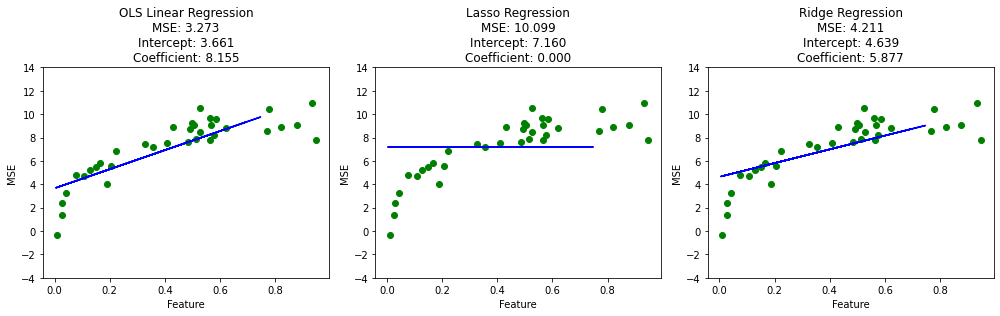

In [25]:
# Set up the three subplots
fig = plt.figure(figsize=(14, 4.5)) 
gs = gridspec.GridSpec(1, 3) 
# Leftmost diagram: OLS
ax0 = plt.subplot(gs[0])
plt.title("OLS Linear Regression\nMSE: %.3f\nIntercept: %.3f\nCoefficient: %.3f" % 
          (mse_ols, ols.intercept_, ols.coef_[0]))
plt.xlabel("Feature")
plt.ylabel("MSE")
plt.ylim(-4, 14)
ax0.scatter(X_train, y_train, color = "green")
ax0.plot(X_test, y_predicted_ols, color = "blue")
# Middle diagram: Lasso
ax1 = plt.subplot(gs[1])
plt.title("Lasso Regression\nMSE: %.3f\nIntercept: %.3f\nCoefficient: %.3f" % 
          (mse_lasso, lasso.intercept_, lasso.coef_[0]))
plt.xlabel("Feature")
plt.ylabel("MSE")
plt.ylim(-4, 14)
ax1.scatter(X_train, y_train, color = "green")
ax1.plot(X_test, y_predicted_lasso, color = "blue")
# Righmost diagram: Ridge
ax2 = plt.subplot(gs[2])
plt.title("Ridge Regression\nMSE: %.3f\nIntercept: %.3f\nCoefficient: %.3f" % 
          (mse_ridge, ridge.intercept_, ridge.coef_[0]))
plt.xlabel("Feature")
plt.ylabel("MSE")
plt.ylim(-4, 14)
ax2.scatter(X_train, y_train, color = "green")
ax2.plot(X_test, y_predicted_ridge, color = "blue")

fig.tight_layout()
plt.show()

<ul>
    <li>Here is an interactive version so that we can play with the 
        regularization hyperparameter ($\lambda$, but called <code>alpha</code>) to see how it
        affects the fit.
    </li>
</ul>

In [26]:
def plot_model(model, alpha):
    plt.figure()
    plt.title("%s with lambda (alpha) = %.1f" % (model, alpha))
    plt.xlabel("Feature")
    plt.ylabel("MSE")
    plt.ylim(-4, 14)
    plt.scatter(X_train, y_train, color = "green")
    if model == "lasso":
        model = Lasso(alpha)
    else:
        model = Ridge(alpha)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    plt.plot(X_test, y_predicted, color = "blue")
    plt.show()
    
interactive_plot = interactive(plot_model, {'manual': True}, scale=True, alpha=(0,3,.1), model=["lasso", "ridge"]) 
interactive_plot

interactive(children=(Dropdown(description='model', options=('lasso', 'ridge'), value='lasso'), FloatSlider(va…

<ul>
    <li>Regularization is a response to overfitting. The problem with the example above is that we
        are regularizing a model (linear regression) on a dataset that it underfits!
    </li>
    <li>To see the value of regularization, let's regularize a model that does overfit. 
        Let's regularize Polynomial Regression with degree 30.
    </li>
</ul>

In [27]:
def plot_model(model, alpha):
    plt.figure()
    plt.title("%s with lambda (alpha) = %.1f" % (model, alpha))
    plt.xlabel("Feature")
    plt.ylabel("MSE")
    plt.ylim(-4, 14)
    plt.scatter(X_train, y_train, color = "green")
    if model == "lasso":
        model = Pipeline([("poly", PolynomialFeatures(degree=30, include_bias=False)),
                          ("predictor", Lasso(alpha))])
    else:
        model = Pipeline([("poly", PolynomialFeatures(degree=30, include_bias=False)),
                          ("predictor", Ridge(alpha))])
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    test_sorted = sorted(zip(X_test, y_predicted))
    plt.plot([x for x, _ in test_sorted], [y_predicted for _, y_predicted in test_sorted], color = "blue")
    plt.show()
    
interactive_plot = interactive(plot_model, {'manual': True}, scale=True, alpha=(0,3,.1), model=["lasso", "ridge"]) 
interactive_plot

interactive(children=(Dropdown(description='model', options=('lasso', 'ridge'), value='lasso'), FloatSlider(va…

<h1>Concluding Remarks</h1>
<ul>
    <li>For completeness, we mention Elastic Net, which combines Lasso and Ridge regularization, with yet
        another hyperparameter to control the balance between the two.
    </li>
    <li>Using some regularization is usually better than none, and Ridge is a good default.
    </li>
    <li>But we now have an extra hyperparameter whose value we must choose.</li>
</ul>